# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

Ans 1:

In [1]:
import pandas as pd
Iris = pd.read_csv('Iris.csv',index_col=0)
print('Ans: 10 Random rows of data Iris')
(Iris.sample(10))

Ans: 10 Random rows of data Iris


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
3,4.7,3.2,1.3,0.2,Iris-setosa
76,6.6,3.0,4.4,1.4,Iris-versicolor
147,6.3,2.5,5.0,1.9,Iris-virginica
20,5.1,3.8,1.5,0.3,Iris-setosa
75,6.4,2.9,4.3,1.3,Iris-versicolor
134,6.3,2.8,5.1,1.5,Iris-virginica
114,5.7,2.5,5.0,2.0,Iris-virginica
8,5.0,3.4,1.5,0.2,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

Ans 2 :

In [2]:
Iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

ANS: Missing values have not been found in any of the columns of the data set Iris.

Fill missing values with median of that particular column

Ans:If there were some missing values ; the steps followed for replacing would be as following:


Step 1 : We will find the median,mode or suitable estimated value for a particular column using command as under:
         

Dataframe['Column_name'].mean()

Step 2: We will fill the null or missing values with estimated value using command as under:

Dateframe['Column_name'].fillna(Dataframe['Column_name'].mean(),inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

Ans 3:

In [3]:
Iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
from sklearn import preprocessing 
Iris['Species']=preprocessing.LabelEncoder().fit_transform(Iris['Species'])
print(Iris.sample(6))
print('Ans : Three unique classes of species are labeled with values 0,1,2 and are changed to numerical type i.e',Iris['Species'].dtypes)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
Id                                                                    
31             4.8           3.1            1.6           0.2        0
88             6.3           2.3            4.4           1.3        1
39             4.4           3.0            1.3           0.2        0
32             5.4           3.4            1.5           0.4        0
118            7.7           3.8            6.7           2.2        2
30             4.7           3.2            1.6           0.2        0
Ans : Three unique classes of species are labeled with values 0,1,2 and are changed to numerical type i.e int32


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

Ans :4

In [6]:
Iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


None of the correlation of feature variable  falls between the range of -0.1 to 0.1 with target variable and hence cannot be dropped.

if there was any feature which has correlation between ranges as mentioned in question we will remove it using command as following:

Dataframe = Dataframe.drop(['Column_name'], axis = 1,inplace=True)

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

Ans 5 :

In [7]:
print('Variance of Independent variables')
Iris.loc[:,('SepalLengthCm','PetalLengthCm','PetalWidthCm','SepalWidthCm')].var()

Variance of Independent variables


SepalLengthCm    0.685694
PetalLengthCm    3.113179
PetalWidthCm     0.582414
SepalWidthCm     0.188004
dtype: float64

Ans : None of the independent variables have variance < 0.1 and hence cannot be dropped.

if there was any features which has correlation between ranges as mentioned in question we will remove it using command as following:

Dataframe = Dataframe.drop(['Column_name'], axis = 1,inplace=True)

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

Ans 6:

In [8]:
import seaborn as sns

print('Pair plot of all variables')
sns.pairplot(Iris)

Pair plot of all variables


## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

Ans 7:

In [9]:
from sklearn.model_selection import train_test_split
Iris.head(0)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,


Setting values of X as feature variables and Y as target variable.

In [10]:
X = Iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = Iris['Species']

Ans: Splittig data into train test with 80:20 ratio

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [12]:
print('Ans:')
print('(a):Size of Iris in terms of rows,col before splitting =',Iris.shape)
print('(b):Size  of sample X_train =',len(X_train),'rows and 4 columns')
print('(c):Size of sample X_test  =',len(X_test),'rows and 4 columns')
print('(d):Size of sample Y_train =',len(Y_train),'rows and 1 column')
print('(e):Size of sample Y_test  =',len(Y_test),'rows and 1 column')
print('(f):Train Test samples Shapes after splitting = ','Xtrain=',X_train.shape,'Xtest =',X_test.shape,'Ytrain=',Y_train.shape,'Ytest=',Y_test.shape)
print('(g):Data set Train/Test split ratio = sample train /sample test=',len(X_train)/len(X_test),'= 4/1 = 80:20')

Ans:
(a):Size of Iris in terms of rows,col before splitting = (150, 5)
(b):Size  of sample X_train = 120 rows and 4 columns
(c):Size of sample X_test  = 30 rows and 4 columns
(d):Size of sample Y_train = 120 rows and 1 column
(e):Size of sample Y_test  = 30 rows and 1 column
(f):Train Test samples Shapes after splitting =  Xtrain= (120, 4) Xtest = (30, 4) Ytrain= (120,) Ytest= (30,)
(g):Data set Train/Test split ratio = sample train /sample test= 4.0 = 4/1 = 80:20


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

Ans 8:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=3 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=3 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=3 is 0.9666666666666667
the training accuracy of model at k=3 is 0.95


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=5 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=5 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=5 is 0.9666666666666667
the training accuracy of model at k=5 is 0.95


In [16]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print('the testing accuracy of model at k=9 is',accuracy_score(knn.predict(X_test),Y_test))
print('the training accuracy of model at k=9 is',accuracy_score(knn.predict(X_train),Y_train))

the testing accuracy of model at k=9 is 1.0
the training accuracy of model at k=9 is 0.9583333333333334


### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

Ans9:

In [17]:
scores_test=[]

In [18]:
scores_train=[]

In [19]:
for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scores_test.append(accuracy_score(knn.predict(X_test),Y_test))
    scores_train.append(accuracy_score(knn.predict(X_train),Y_train))
print('Testing accuracy of model for various values of k are =',scores_test)
print('Training accuracy of model for various values of k are =',scores_train)

Testing accuracy of model for various values of k are = [1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Training accuracy of model for various values of k are = [1.0, 0.95, 0.95, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.95]


As considering only 1 neigbour is not suffice, we ignore the value for k=1.So for  different K values ranging from 1 to 19 ,the optimal value of K for testing accuracies is found to be at K=7

As considering only 1 neigbour is not suffice, we ignore the value for k=1.For different K values ranging from 1 to 19 ,the optimal value of K for training accuracies is found to be at K =7 too

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Ans:

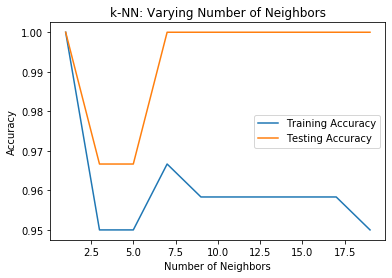

In [20]:
import matplotlib.pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,20,2),scores_train, label = 'Training Accuracy')
plt.plot(range(1,20,2), scores_test, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

Ans 1

In [21]:
BC = pd.read_csv('bc2.csv',index_col=0)
BC.sample(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
1113038,8,2,4,1,5,1,5,4,4,4
1067444,2,1,1,1,2,1,2,1,1,2
1059552,1,1,1,1,2,1,3,1,1,2
1229929,1,1,1,1,2,1,2,1,1,2
1177399,8,3,5,4,5,10,1,6,2,4
824249,1,1,1,1,2,1,3,1,1,2
601265,10,4,4,6,2,10,2,3,1,4
1333877,5,4,5,1,8,1,3,6,1,2
1201870,4,1,1,3,1,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [22]:
import pandas as pd
import numpy as np

Ans 2:

In [23]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

Ans 3:

In [24]:
BC.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [25]:
BC.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The column 'Bare Nuclei' is not summarized under describe() function because either all inputs for this column is in object type or some special characters of object type are present in it .So either the whole column is needed to be changed in to type int  or special characters are needed to be replaced with int type of suitable value.

#### Check Missing Values

In [26]:
BC.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

No missing values have been found in any of the columns.

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

Ans 4:

In [27]:
BC['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

There are 16 '?'special characters(unknown values) in Bare Nuclei feature.

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

Ans:

In [28]:
BC['Bare Nuclei'].describe(include='all')

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [29]:
print('Before replacing missing values:')
print(BC.iloc[[22,23,24], [5]])
BC['Bare Nuclei'].replace('?',1,inplace=True)
print('After replacing missing values with top value of decribe function i.e 1')
print(BC.iloc[[22,23,24], [5]])

Before replacing missing values:
        Bare Nuclei
ID                 
1056784           1
1057013           ?
1059552           1
After replacing missing values with top value of decribe function i.e 1
        Bare Nuclei
ID                 
1056784           1
1057013           1
1059552           1


### Question 5
#### Find the distribution of target variable (Class) 

Ans 5:(a)

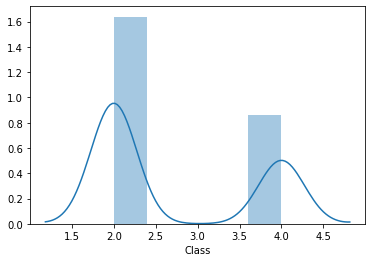

In [30]:
sns.distplot(BC['Class'])

#### Plot the distribution of target variable using histogram

Ans 5:(b)

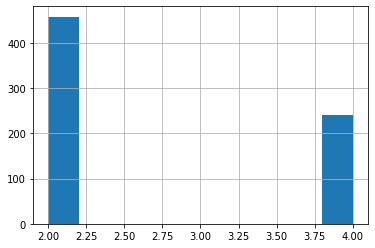

In [31]:
BC['Class'].hist()

#### Convert the datatype of Bare Nuclei to `int`

Ans 5:(c)

In [32]:
print('Type of Bare Nuclei =',BC['Bare Nuclei'].dtypes,'before conversion')
BC['Bare Nuclei']=BC['Bare Nuclei'].astype(int)
print('Type of Bare Nuclei =',BC['Bare Nuclei'].dtypes,'after conversion')

Type of Bare Nuclei = object before conversion
Type of Bare Nuclei = int32 after conversion


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

Ans 6:

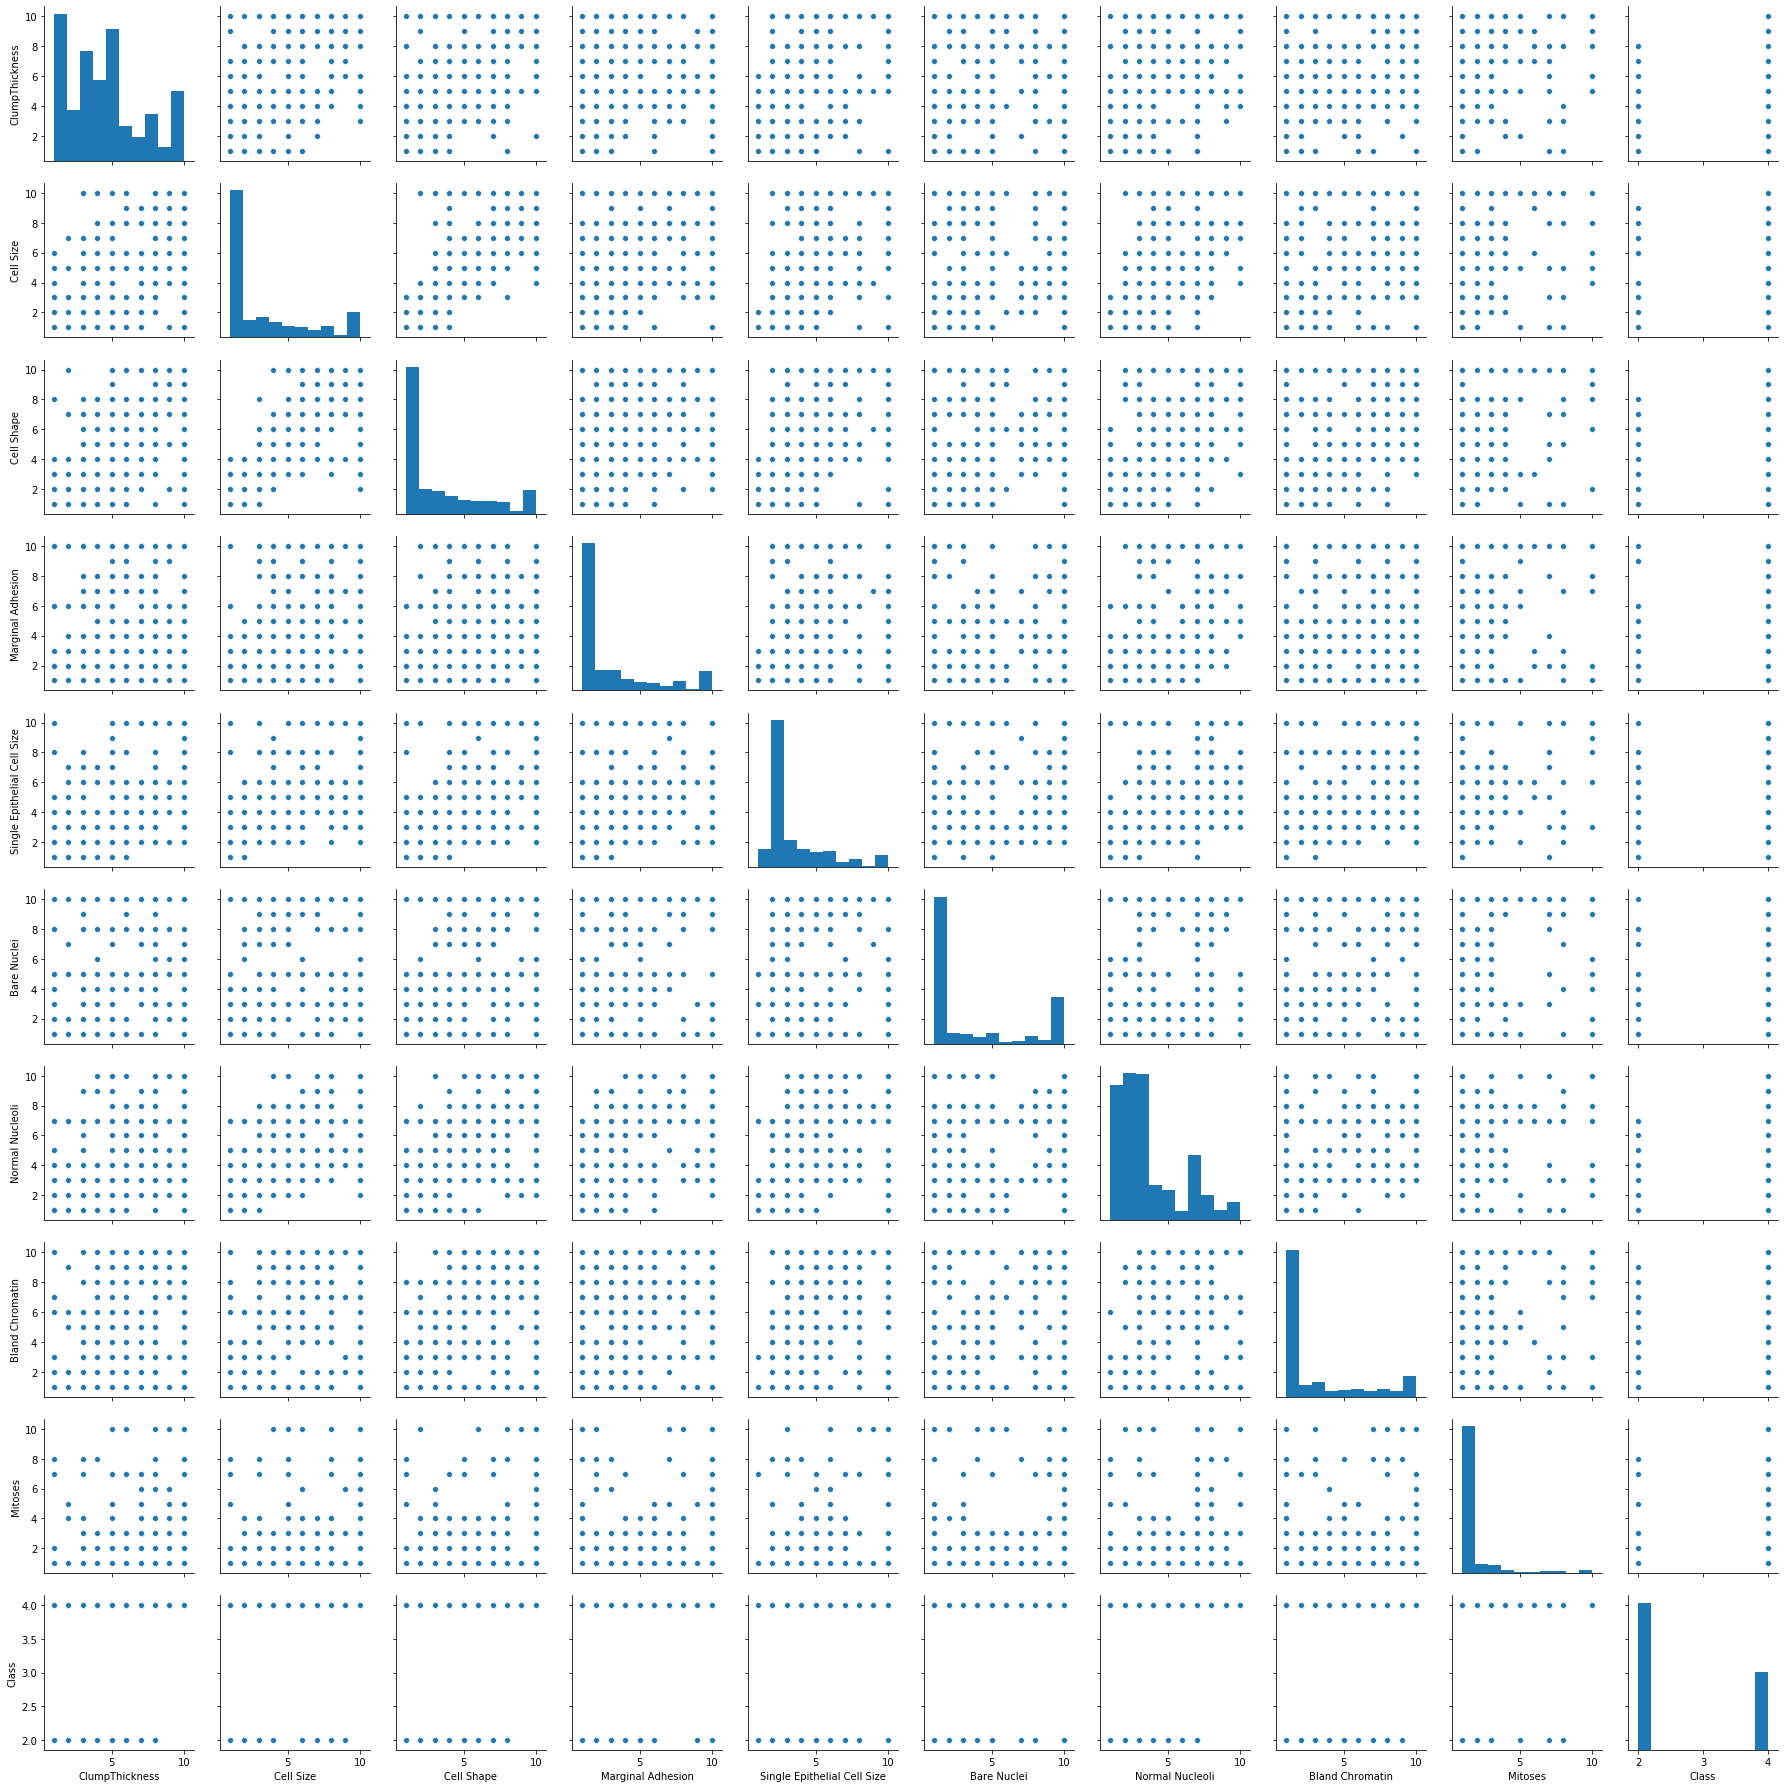

In [33]:
sns.pairplot(BC)

Ans: No high collinearity is found between any two variables 

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

Ans 7:(a)

In [34]:
BC.sample(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,,,,,,,,,,
1180523,3,1,1,1,2,1,2,2,1,2
1049837,1,1,1,1,2,1,1,1,1,2


In [35]:
print('X sample')
X = BC.iloc[:,0:9]
print(X.sample(1))
print('\n')
print('\n')
print('Y sample')
Y=BC.iloc[:,9]
print(Y.sample(2))

X sample
        ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
ID                                                                 
636375               5          1           1                  1   

        Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
ID                                                                  
636375                            2            1                1   

        Bland Chromatin  Mitoses  
ID                                
636375                1        1  




Y sample
ID
1270479    2
1016634    2
Name: Class, dtype: int64


#### Divide the Training and Test sets in 70:30 

Ans 7:(b)

In [36]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.3,random_state=0)

In [37]:
print('Ans:')
print('(a):Size of BC in terms of rows,col =',BC.shape)
print('(b):Size  of sample X_train =',len(X_train),'rows and 9 columns')
print('(c):Size of sample X_test  =',len(X_test),'rows and 9 columns')
print('(d):Size of sample Y_train =',len(Y_train),'rows and 1 column')
print('(e):Size of sample Y_test  =',len(Y_test),'rows and 1 column')
print('(f):Train Test Shapes--->','Xtrain=',X_train.shape,'Xtest =',X_test.shape,'Ytrain=',Y_train.shape,'Ytest=',Y_test.shape)
print('(g):Data set Train/Test split ratio = sample train /sample test=',len(X_train)/len(X_test),'= approx: 70:30')

Ans:
(a):Size of BC in terms of rows,col = (699, 10)
(b):Size  of sample X_train = 489 rows and 9 columns
(c):Size of sample X_test  = 210 rows and 9 columns
(d):Size of sample Y_train = 489 rows and 1 column
(e):Size of sample Y_test  = 210 rows and 1 column
(f):Train Test Shapes---> Xtrain= (489, 9) Xtest = (210, 9) Ytrain= (489,) Ytest= (210,)
(g):Data set Train/Test split ratio = sample train /sample test= 2.3285714285714287 = approx: 70:30


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

Ans 8:

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [39]:
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

In [40]:
print('scaled X_train sample','\n',scaledX_train[1:6])
print('scaled shape',scaledX_train.shape)

scaled X_train sample 
 [[ 0.59158256  2.24505586 -0.38907961  1.80485186  3.08052741 -0.37840106
   1.48363312  1.62612642  5.20737349]
 [-0.12446663  1.27064848  1.62070838  0.07023598  0.35897745  1.8644852
   2.30946874 -0.61110458 -0.32561799]
 [-1.19854041 -0.67816628 -0.72404428 -0.62361037 -0.54820587 -0.65876184
  -0.58095594 -0.61110458 -0.32561799]
 [ 0.23355797  0.2962411   0.95077905  1.80485186  0.35897745 -0.65876184
   1.89655093  2.26533528 -0.32561799]
 [ 2.02368094  2.24505586  2.29063771  1.45792868  2.62693575  1.8644852
   1.48363312  2.26533528  5.20737349]]
scaled shape (489, 9)


In [41]:
print('scaled X_test sample','\n',scaledX_test[1:6])
print('scaled shape',scaledX_test.shape)

scaled X_test sample 
 [[-0.12446663 -0.35336382 -0.38907961 -0.62361037 -0.54820587 -0.65876184
  -0.58095594 -0.61110458 -0.32561799]
 [ 0.59158256  0.94584602  0.95077905  2.15177504  1.26616077 -0.65876184
   1.48363312  1.62612642 -0.32561799]
 [ 0.23355797 -0.67816628 -0.72404428 -0.62361037 -0.54820587 -0.65876184
  -0.58095594 -0.29150015 -0.32561799]
 [ 1.30763175  1.27064848  0.61581439  2.49869821  1.71975243  1.58412442
   0.6577975   0.66731313  1.5187125 ]
 [-0.84051582 -0.67816628 -0.72404428 -0.62361037 -0.54820587 -0.65876184
  -0.16803813 -0.61110458 -0.32561799]]
scaled shape (210, 9)


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

Ans9 :

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,Y_train)
print('the testing accuracy of model at k=3 is',accuracy_score(knn.predict(scaledX_test),Y_test))
print('the training accuracy of model at k=3 is',accuracy_score(knn.predict(scaledX_train),Y_train))

the testing accuracy of model at k=3 is 0.9476190476190476
the training accuracy of model at k=3 is 0.9856850715746421


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,Y_train)
print('the testing accuracy of model at k=5 is',accuracy_score(knn.predict(scaledX_test),Y_test))
print('the training accuracy of model at k=5 is',accuracy_score(knn.predict(scaledX_train),Y_train))

the testing accuracy of model at k=5 is 0.9476190476190476
the training accuracy of model at k=5 is 0.9775051124744376


In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(scaledX_train,Y_train)
print('the testing accuracy of model at k=9 is',accuracy_score(knn.predict(scaledX_test),Y_test))
print('the training accuracy of model at k=9 is',accuracy_score(knn.predict(scaledX_train),Y_train))

the testing accuracy of model at k=9 is 0.9428571428571428
the training accuracy of model at k=9 is 0.9775051124744376


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

Ans 10 :

In [45]:
scoretrainBC=[]

In [46]:
scoretestBC=[]

In [47]:
for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,Y_train)
    scoretestBC.append(accuracy_score(knn.predict(scaledX_test),Y_test))
    scoretrainBC.append(accuracy_score(knn.predict(scaledX_train),Y_train))
print('Testing accuracy of model for various values of k are =',scoretestBC)
print('&')
print('Training accuracy of model for various values of k are =',scoretrainBC)

Testing accuracy of model for various values of k are = [0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9523809523809523, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428]
&
Training accuracy of model for various values of k are = [1.0, 0.9856850715746421, 0.9775051124744376, 0.9775051124744376, 0.9775051124744376, 0.9775051124744376, 0.9734151329243353, 0.9734151329243353, 0.9713701431492843, 0.9734151329243353]


 As considering only 1 neigbour is not suffice, we ignore the value for k=1.Apart from it, the optimal value for k for various testing accuracies is 13.

As considering only 1 neigbour is not suffice, we ignore the value for k=1.Apart from it ,the optimal value for k for various training accuracies is 13.

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Ans 11:

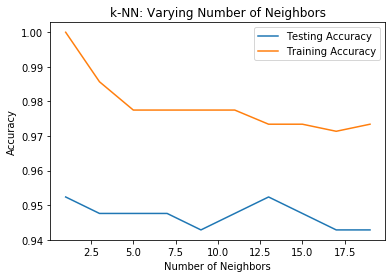

In [48]:
import matplotlib.pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(range(1,20,2),scoretestBC, label = 'Testing Accuracy')
plt.plot(range(1,20,2), scoretrainBC, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()